In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from imdb import Cinemagoer

In [5]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

### relevant fields:

**Keys**
- 'imdbID',
- 'title',

**Meta Data**
- 'original title',
- 'rating',
- 'director',
- 'runtimes',
- 'genres',
- 'box office',
- 'cover url',
- 'year', 
- 'top 250 rank',
- 'awards',
- 'akas',
- 'cast',

**Geo**
- 'country codes'
- 'countries',
- 'locations',
- 'language codes',


**Text**
- 'plot',
- 'plot outline',
- 'critic reviews',
- 'reviews',
- 'quotes'

In [3]:
'awards'  ???

SyntaxError: invalid syntax (<ipython-input-3-b8e4ab6ae799>, line 1)

# Get Movie Data

In [69]:
from profanity_detector.get_data import movie_data, get_all_movie_data, run_and_display, get_all_movie_data

In [70]:
movie_meta, quotes_df, reviews_df, locations_df = movie_data('machete')

In [71]:
movie_meta

{'imdb_id': '0985694',
 'title': 'Machete',
 'rating': 6.6,
 'director': ['Ethan Maniquis', 'Robert Rodriguez'],
 'runtime': '105 Min',
 'genres': ['Action', 'Crime', 'Thriller'],
 'year': 2010,
 'box_office': '$44,093,316, 09 Dec 2013',
 'top_250_rank': "Didn't make it here yet...",
 'cast': ['Danny Trejo',
  'Robert De Niro',
  'Jessica Alba',
  'Steven Seagal',
  'Michelle Rodriguez',
  'Jeff Fahey',
  'Cheech Marin',
  'Don Johnson',
  'Shea Whigham',
  'Lindsay Lohan',
  'Daryl Sabara',
  'Gilbert Trejo',
  'Ara Celi',
  'Tom Savini',
  'Billy Blair',
  'Felix Sabates',
  'Electra Avellan',
  'Elise Avellan',
  'Marci Madison',
  'Vic Trevino',
  'Mayra Leal',
  'Alejandro Antonio',
  'Juan Gabriel Pareja',
  'Alicia Rachel Marek',
  'Jason Douglas',
  'Mitchell Lance Adams',
  'Brent Smiga',
  'Chris Warner',
  'Jim Henry',
  'Tina Rodriguez',
  'Roland Ruiz',
  'Greg Ingram',
  'Tito Larriva',
  'Cheryl Chin',
  'Hugo Perez',
  'Nina Leon',
  'Doran Ingram',
  'James Brownlee',


In [94]:
movie_data = get_all_movie_data('lord of the rings')

In [91]:
movie_data.keys()

['localized title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'original title',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'editor',
 'editorial department',
 'casting director',
 'production design',
 'set decoration',
 'costume designer',
 'make up',
 'production manager',
 'assistant director',
 'art department',
 'sound crew',
 'special effects',
 'visual effects',
 'stunt performer',
 'camera and electrical department',
 'casting department',
 'costume department',
 'location management',
 'music department',
 'script department',
 'transportation department',
 'miscellaneous crew',
 'thanks',
 'akas',
 'production companies',
 'distributors',
 'special effects companies',
 'other companies',
 'plot',
 'synops

In [95]:
movie_data['locations']

['Wellington, New Zealand::(Bree)',
 'Hinuera Valley, Matamata, Waikato, New Zealand::(Hobbiton)',
 'Kaitoke Regional Park, Wellington Region, New Zealand::(Rivendell) (River Anduin)',
 'Queenstown, Otago, New Zealand::(Ford of Bruinen) (River Anduin) (Amon Hen)',
 'Milford Sound, Fiordland National Park, Southland, New Zealand',
 'Port Waikato, Waikato, New Zealand::(Weathertop)',
 'Fernside, Featherston, Wairarapa, New Zealand::(Lothlorien)',
 'Rangipo Desert, Waiouru, Tongariro National Park, Central Plateau, New Zealand',
 'Rangitikei River, Manawatu-Wanganui, New Zealand::(River Anduin)',
 'Tongariro National Park, Central Plateau, New Zealand::(Mordor)',
 'Lake Wakatipu, Queenstown, Otago, New Zealand::(Amon Hen)',
 'Mavora Lakes, Southland, New Zealand::(Amon Hen)',
 'Tarras, Wanaka, Otago, New Zealand::(Ford of Bruinen)',
 'Canterbury, New Zealand::(Edoras)',
 "Poet's Corner, Upper Hutt, Wellington, New Zealand::(River Anduin)",
 'South Island, New Zealand::(waterfalls scenes o

In [132]:
quotes_df.head()

,imdb_id,title,content
0,0103639,Aladdin,Genie: Oi! Ten thousand years will give you su...
1,0103639,Aladdin,"_Aladdin_ (qv): Genie, I wish for your freedom..."
2,0103639,Aladdin,"Genie: [as a group of cheerleaders] Rick 'em, ..."
3,0103639,Aladdin,Genie: I'm free. I'm free. Quick. Quick. Wish ...
4,0103639,Aladdin,_Aladdin_ (qv): [saving Jasmine from an irate ...


In [133]:
reviews_df.head()

,content,helpful,title,author,date,rating,not_helpful,imdb_id
0,"Everybody seems to love Disney's ""Aladdin""...a...",8,Aladdin,ur2467618,8 January 2020,7.0,33,0103639
1,"Aladdin is a brilliant movie. Sure, it isn't a...",20,Aladdin,ur20552756,17 February 2009,10.0,5,0103639
2,"Jafar, Grand Vizier to the Sultan sends a con ...",4,Aladdin,ur2898520,21 November 2015,8.0,3,0103639
3,This is part of the Disney winning streak of w...,2,Aladdin,ur0278527,29 December 2016,10.0,0,0103639
4,It's a shame that voice acting has never been ...,3,Aladdin,ur0968789,21 January 2021,10.0,0,0103639


In [89]:
locations_df.head()

,locations,imdb_id,title
0,"St. Mary's Church - 203 E. 10th St. Austin, Te...",0985694,Machete
1,"Austin, Texas, USA",0985694,Machete
2,"Troublemaker Studios - 4900 Old Manor Road, Au...",0985694,Machete
3,"Texas, USA",0985694,Machete
4,USA,0985694,Machete


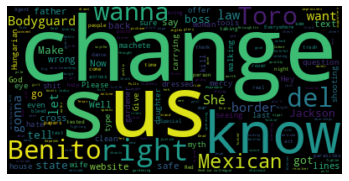

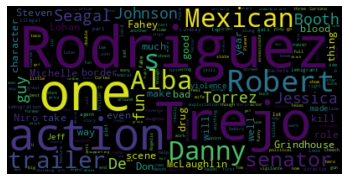

What Is Your Favourite Movie? : aladdin 1992
Movie Details: 
 {'imdb_id': '0103639', 'title': 'Aladdin', 'rating': 8.0, 'director': ['Ron Clements', 'John Musker'], 'runtime': '90 Min', 'genres': ['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance'], 'year': 1992, 'box_office': '$504,050,219', 'top_250_rank': "Didn't make it here yet...", 'cast': ['Scott Weinger', 'Robin Williams', 'Linda Larkin', 'Jonathan Freeman', 'Frank Welker', 'Gilbert Gottfried', 'Douglas Seale', 'Charlie Adler', 'Jack Angel', 'Corey Burton', 'Philip L. Clarke', 'Jim Cummings', 'Jennifer Darling', 'Debi Derryberry', 'Bruce Gooch', 'Jerry Houser', 'Vera Lockwood', 'Sherry Lynn', 'Mickie McGowan', 'Patrick Pinney', 'Phil Proctor', 'Bruce Adler', 'Brad Kane', 'Thurl Ravenscroft', 'Lea Salonga', 'Hal Smith'], 'cover_url': 'https://m.media-amazon.com/images/M/MV5BY2Q2NDI1MjUtM2Q5ZS00MTFlLWJiYWEtNTZmNjQ3OGJkZDgxXkEyXkFqcGdeQXVyNTI4MjkwNjA@._V1_SY150_CR0,0,101,150_.jpg', 'akas': ['Aladdín (Spa

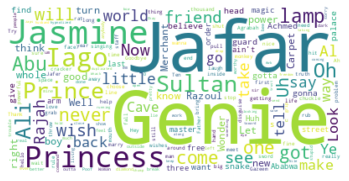

In [127]:
run_and_display()

What Is Your Favourite Movie? : mission impossible
Movie Details: 
 {'imdb_id': '0117060', 'title': 'Mission: Impossible', 'rating': 7.1, 'director': ['Brian De Palma'], 'runtime': '110 Min', 'genres': ['Action', 'Adventure', 'Thriller'], 'year': 1996, 'box_office': '$457,696,359', 'top_250_rank': "Didn't make it here yet...", 'cast': ['Tom Cruise', 'Jon Voight', 'Emmanuelle Béart', 'Henry Czerny', 'Jean Reno', 'Ving Rhames', 'Kristin Scott Thomas', 'Vanessa Redgrave', 'Ingeborga Dapkunaite', 'Valentina Yakunina', 'Marek Vasut', 'Nathan Osgood', 'John McLaughlin', 'Rolf Saxon', 'Karel Dobrý', 'Andreas Wisniewski', 'David Shaeffer', 'Rudolf Pechan', 'Gaston Subert', 'Ricco Ross', 'Mark Houghton', 'Bob Friend', 'Annabel Mullion', 'Garrick Hagon', 'Jirina Trebická', 'Andrzej Borkowski', 'Maya Dokic', 'Sam Douglas', 'Olegar Fedoro', 'Carmela Marner', 'Mimi Potworowska', 'David Schneider', 'Helen Lindsay', 'Pat Starr', 'Richard D. Sharp', 'Randall Paul', 'Sue Doucette', 'Graydon Gould', 'To

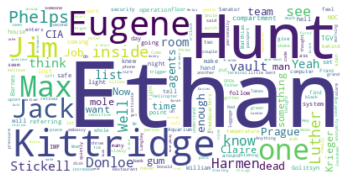

In [139]:
run_and_display()

# Geo widget

In [160]:
from profanity_detector.feature_data_enrichment import get_geolocation_data, get_coordinates, split_location
from geopy.geocoders import Nominatim

In [141]:
locations_df

,locations,imdb_id,title
0,Walt Disney Feature Animation - 500 S. Buena V...,0103639,Aladdin


In [154]:
locations_df

,locations,imdb_id,title
0,"Wellington, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
1,"Hinuera Valley, Matamata, Waikato, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
2,"Kaitoke Regional Park, Wellington Region, New ...",0120737,The Lord of the Rings: The Fellowship of the Ring
3,"Queenstown, Otago, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
4,"Milford Sound, Fiordland National Park, Southl...",0120737,The Lord of the Rings: The Fellowship of the Ring
5,"Port Waikato, Waikato, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
6,"Fernside, Featherston, Wairarapa, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
7,"Rangipo Desert, Waiouru, Tongariro National Pa...",0120737,The Lord of the Rings: The Fellowship of the Ring
8,"Rangitikei River, Manawatu-Wanganui, New Zealand",0120737,The Lord of the Rings: The Fellowship of the Ring
9,"Tongariro National Park, Central Plateau, New ...",0120737,The Lord of the Rings: The Fellowship of the Ring


In [153]:
locations = get_geolocation_data(locations_df)

AttributeError: 'NoneType' object has no attribute 'latitude'

In [167]:
location = split_location("Poet's Corner, Upper Hutt, Wellington, New Zealand")

In [168]:
location

"Poet's Corner, Upper Hutt, Wellington, New Zealand"

In [169]:
get_coordinates(location)

(-41.1240674, 175.0699589)

In [161]:
geolocator = Nominatim(user_agent="profanity_detector")

In [162]:
film_location = geolocator.geocode(location)

In [163]:
film_location

Location(Wellington, Wellington City, Wellington, 6011, New Zealand / Aotearoa, (-41.2887953, 174.7772114, 0.0))

# wordcloud 

In [86]:
from profanity_detector.movie_features import create_word_cloud, plot_word_cloud

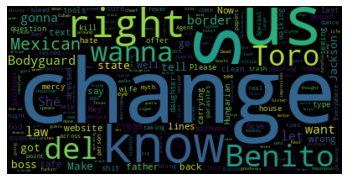

In [87]:
plot_word_cloud(create_word_cloud(quotes_df, movie_meta['characters']))

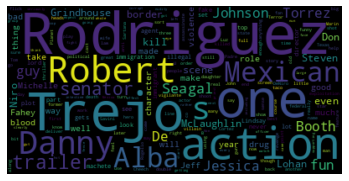

In [88]:
plot_word_cloud(create_word_cloud(reviews_df))

In [29]:
movie_data = get_all_movie_data('lord of the rings')

In [30]:
movie_data.keys()

['original title',
 'localized title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'editor',
 'editorial department',
 'casting director',
 'production design',
 'art direction',
 'set decoration',
 'costume designer',
 'make up',
 'production manager',
 'assistant director',
 'art department',
 'sound crew',
 'special effects',
 'visual effects',
 'stunt performer',
 'camera and electrical department',
 'casting department',
 'costume department',
 'location management',
 'music department',
 'script department',
 'transportation department',
 'miscellaneous crew',
 'thanks',
 'akas',
 'top 250 rank',
 'production companies',
 'distributors',
 'special effects companies',
 '

In [31]:
movie_data['cast'][0].keys()

['name', 'canonical name', 'long imdb name', 'long imdb canonical name']

In [32]:
movie_data['cast'][0]['long imdb canonical name']

'Howard, Alan'

In [39]:
movie_data['cast'][4].currentRole['name']

'Boromir'

In [40]:
len(movie_data['cast'])

135

In [49]:
type(movie_data['cast'][32].currentRole)

imdb.utils.RolesList

In [42]:
movie_data['cast']

[<Person id:0397102[http] name:_Alan Howard_>,
 <Person id:0032370[http] name:_Noel Appleby_>,
 <Person id:0000276[http] name:_Sean Astin_>,
 <Person id:1019674[http] name:_Sala Baker_>,
 <Person id:0000293[http] name:_Sean Bean_>,
 <Person id:0000949[http] name:_Cate Blanchett_>,
 <Person id:0089217[http] name:_Orlando Bloom_>,
 <Person id:0101710[http] name:_Billy Boyd_>,
 <Person id:0190744[http] name:_Marton Csokas_>,
 <Person id:1104283[http] name:_Megan Edwards_>,
 <Person id:1096480[http] name:_Michael Elsworth_>,
 <Person id:0272527[http] name:_Mark Ferguson_>,
 <Person id:0000453[http] name:_Ian Holm_>,
 <Person id:0000489[http] name:_Christopher Lee_>,
 <Person id:0538692[http] name:_Lawrence Makoare_>,
 <Person id:0785227[http] name:_Andy Serkis_>,
 <Person id:1098595[http] name:_Brent McIntyre_>,
 <Person id:0005212[http] name:_Ian McKellen_>,
 <Person id:1013159[http] name:_Peter McKenzie_>,
 <Person id:0572867[http] name:_Sarah McLeod_>,
 <Person id:0597480[http] name:_Do

In [55]:
characters = []
for i in range(len(movie_data['cast'])):
    if isinstance(movie_data['cast'][i].currentRole, list):
        pass
    else:
        characters.append(movie_data['cast'][i].currentRole['name'])
    

Voice of the Ring
Everard Proudfoot
Sam
Sauron
Boromir
Galadriel
Legolas
Pippin
Celeborn
Mrs. Proudfoot
Gondorian Archivist
Gil-galad
Bilbo
Saruman
Lurtz
Gollum
Witch-king
Gandalf
Elendil
Rosie Cotton
Merry
Aragorn
Bounder
Haldir
Farmer Maggot
Gimli
Gate Keeper
Isildur
Arwen
Barliman Butterbur
Elrond
Frodo
Cute Hobbit Child
Cute Hobbit Child
Otho
Mrs. Bracegirdle
Gaffer Gamgee
Old Noakes
Lobelia
Ted Sandyman
Ring Dwarf-lord
Hobbit
Council Elf
Orc
Hobbit
Last Alliance Elf
Lothlorien Elf
Uruk at Amon Hen
Hobbit
Ringwraith
Cute Hobbit Child
Uruk-hai
Party Hobbit
Goblin
Cave Troll
Rivendell Elf
Uruk-hai
Khai
Uruk-hai
Uruk-hai
Ring Dwarf-lord
Cute Hobbit Child
Isengard Orc Blacksmith
Kissing Hobbit
Cute Hobbit Child
Council Man
Hobbit
Goblin
Albert Dreary
Rivendell Elf
Isengard Orc Blacksmith
Gondorian Citizen
Party Hobbit
Uruk-hai
Ring King of Men
Arms of Gollum
Isengard Orc Blacksmith
Village Female Hobbit
Goblin
Ring Dwarf-lord
Figwit
Uruk-hai
Hobbit Band Member
Burning Ringwraith
Uruk-h

In [34]:
remove_names = []
for actor in movie_data['cast']:
    remove_names.append(actor.currentRole['name'])

TypeError: list indices must be integers or slices, not str

In [23]:
remove_names

['Neo',
 'Morpheus',
 'Trinity',
 'Agent Smith',
 'Oracle',
 'Cypher',
 'Tank',
 'Apoc',
 'Mouse',
 'Switch',
 'Dozer',
 'Agent Brown',
 'Agent Jones',
 'Rhineheart',
 'Choi',
 'Dujour',
 'Priestess',
 'Spoon Boy',
 'Potential',
 'Potential',
 'Potential',
 'Potential',
 'Potential',
 'Lieutenant',
 'FedEx Man',
 'Businessman',
 'Woman in Red',
 'Old Man',
 'Blind Man',
 'Security Guard',
 'Guard',
 'Cop Who Captures Neo',
 'Big Cop',
 'Cop',
 'Cop',
 'Parking Cop',
 'Twin',
 'Resistance Member',
 'Shaylae - Woman in Office',
 'Police Officer',
 'Child']